In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset=pd.read_csv('dataset/Churn_Modelling.csv')

In [4]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [5]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [6]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

In [7]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,1


In [11]:
X=X.drop(['Geography','Gender'],axis=1)

In [12]:
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [38]:
classifier=Sequential()

classifier.add(Dense(units=10,kernel_initializer='he_normal',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=20,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])


In [39]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.7246 - accuracy: 0.7179 - val_loss: 0.5406 - val_accuracy: 0.7917
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6305 - accuracy: 0.7656 - val_loss: 0.5235 - val_accuracy: 0.7933
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5823 - accuracy: 0.7742 - val_loss: 0.5179 - val_accuracy: 0.7933
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7807 - val_loss: 0.5050 - val_accuracy: 0.7948
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7906 - val_loss: 0.5014 - val_accuracy: 0.7948
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5235 - accuracy: 0.7938 - val_loss: 0.4987 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5219 - accuracy: 0.7908 - val_loss: 0.4950 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.8143 - val_loss: 0.4214 - val_accuracy: 0.8118
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8177 - val_loss: 0.4208 - val_accuracy: 0.8126
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.8160 - val_loss: 0.4202 - val_accuracy: 0.8122
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4303 - accuracy: 0.8138 - val_loss: 0.4192 - val_accuracy: 0.8122
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4300 - accuracy: 0.8196 - val_loss: 0.4190 - val_accuracy: 0.8129
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.8169 - val_loss: 0.4175 - val_accuracy: 0.8129
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4265 - accuracy: 0.8169 - val_loss: 0.4157 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


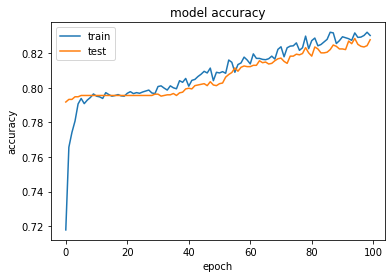

In [40]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [41]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [42]:
cm,score

(array([[1584,   11],
        [ 318,   87]], dtype=int64),
 0.8355)